In [85]:
import numpy as np
import math
import pandas as pd
import os
from pathlib import Path
from sklearn import preprocessing
import matplotlib.pyplot as plt
file = Path('/Users/varunbabbar/Downloads/Pizza.csv')
df = pd.read_csv(file)

relevant_parameters = df.iloc[:,2:len(df)]
# relevant_parameters = relevant_parameters[['prot', 'mois', 'fat', 'ash','sodium','cal','carb']]
X = relevant_parameters.to_numpy()

def num_principal_components(n):
    U,S,VT = np.linalg.svd(X,full_matrices=False)
    S = np.diag(S)
    C = np.dot(U[:,0:n],S[0:n,0:n])
    Cx =C
    C = np.dot(C,VT[0:n,:])
    print('Percentage of variance in data explained by {} components: {}'.format(n,np.trace(S[0:n,0:n])/(np.trace(S))))
    return C,np.transpose(VT[0:n,:])

X_pca,V = num_principal_components(3)
df2 = pd.DataFrame(X_pca)
X_reduced_dimension = np.dot(X_pca,V)
# If the dimensionally reduced representation is desirable, then simply perform Y = X*V = UA 
print(df.head())
print(df2.head())

Percentage of variance in data explained by 3 components: 0.9491733056392412
  brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2     A  14025  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3     A  14016  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4     A  14005  30.49  21.28  41.65  4.82    1.64  1.76  4.67
           0          1          2         3         4         5         6
0  27.910048  21.051756  45.002378  5.078449  1.596118  0.721201  4.922906
1  28.590991  20.874610  44.054522  5.004489  1.561483  0.962808  4.840088
2  28.067348  21.184529  45.388509  5.114214  1.609524  0.951739  4.972225
3  30.379401  20.854133  42.889899  4.937902  1.518135  1.472278  4.754685
4  30.656713  20.568753  41.884339  4.847113  1.481702  1.670383  4.660620


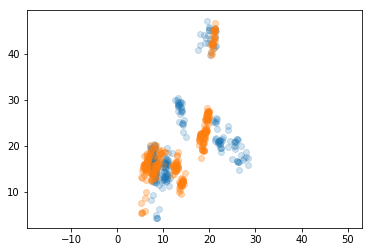

In [86]:
from sklearn.decomposition import PCA
# Essentially, V consists of the set of k principal orthogonal eigenvectors. The dataset A is the 
# change of basis to the one defined by the k principal eigenvectors. 
# plt.scatter(A[:, 0], A[:, 1],alpha=0.9)
plt.scatter(X[:, 1], X[:, 2],alpha=0.2)
plt.scatter(X_pca[:,1],X_pca[:,2],alpha = 0.3)
plt.axis('equal');